In [11]:
#install module scikit-learn for Undersampling
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [12]:
#install or upgrade the "imbalanced-learn" package.Python library to address the problem of imbalanced datasets
pip install -U imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   ------------------- -------------------- 112.6/235.6 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 2.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load dataset using read_csv
diabetes_df = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')
diabetes_df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
#Check column names if they are standard for all columns 
diabetes_df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [4]:
#Transform the column names of a DataFrame to lowercase using the map function and the str.lower function
diabetes_df.columns = map(str.lower, diabetes_df.columns)

In [5]:
#Check column names
diabetes_df.columns

Index(['diabetes_012', 'highbp', 'highchol', 'cholcheck', 'bmi', 'smoker',
       'stroke', 'heartdiseaseorattack', 'physactivity', 'fruits', 'veggies',
       'hvyalcoholconsump', 'anyhealthcare', 'nodocbccost', 'genhlth',
       'menthlth', 'physhlth', 'diffwalk', 'sex', 'age', 'education',
       'income'],
      dtype='object')

In [6]:
#Obtain the dimensions (the number of rows and columns) of the DataFrame
diabetes_df.shape

(253680, 22)

In [7]:
#Check the unique values in target variable.
diabetes_df.diabetes_012.unique()

array([0., 2., 1.])

In [8]:
#Perform the value counts for the target variable to get the idea of the dataset
diabetes_df['diabetes_012'].value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: diabetes_012, dtype: int64

In [9]:
#Check if the null values are present in dataset
diabetes_df.isnull().sum()

diabetes_012            0
highbp                  0
highchol                0
cholcheck               0
bmi                     0
smoker                  0
stroke                  0
heartdiseaseorattack    0
physactivity            0
fruits                  0
veggies                 0
hvyalcoholconsump       0
anyhealthcare           0
nodocbccost             0
genhlth                 0
menthlth                0
physhlth                0
diffwalk                0
sex                     0
age                     0
education               0
income                  0
dtype: int64

In [10]:
#Check the data type of the variables
diabetes_df.dtypes

diabetes_012            float64
highbp                  float64
highchol                float64
cholcheck               float64
bmi                     float64
smoker                  float64
stroke                  float64
heartdiseaseorattack    float64
physactivity            float64
fruits                  float64
veggies                 float64
hvyalcoholconsump       float64
anyhealthcare           float64
nodocbccost             float64
genhlth                 float64
menthlth                float64
physhlth                float64
diffwalk                float64
sex                     float64
age                     float64
education               float64
income                  float64
dtype: object

In [11]:
#converting the data type of each column to 'int'
for col in diabetes_df.columns:
        diabetes_df[col] = diabetes_df[col].astype('int')  

In [12]:
#Check the data type of the variables
diabetes_df.dtypes

diabetes_012            int32
highbp                  int32
highchol                int32
cholcheck               int32
bmi                     int32
smoker                  int32
stroke                  int32
heartdiseaseorattack    int32
physactivity            int32
fruits                  int32
veggies                 int32
hvyalcoholconsump       int32
anyhealthcare           int32
nodocbccost             int32
genhlth                 int32
menthlth                int32
physhlth                int32
diffwalk                int32
sex                     int32
age                     int32
education               int32
income                  int32
dtype: object

In [13]:
#Count the occurrences of unique values in the 'diabetes_012' column of the DataFrame 
diabetes_df['diabetes_012'].value_counts()

0    213703
2     35346
1      4631
Name: diabetes_012, dtype: int64

In [14]:
#Transform the values to make them binary

#Create a boolean(fil) that checks if the values in the 'diabetes_012' column are equal to 1 or 2
fil = ((diabetes_df['diabetes_012'] == 1) | (diabetes_df['diabetes_012'] == 2))

#locate the rows in the 'diabetes_012' column where the condition is True (i.e., where the values are 1 or 2) 
#and sets those values to 1.
diabetes_df.loc[fil, 'diabetes_012'] = 1

#Show the count of occurrences for each unique value in the column after the transformation
diabetes_df['diabetes_012'].value_counts()

0    213703
1     39977
Name: diabetes_012, dtype: int64

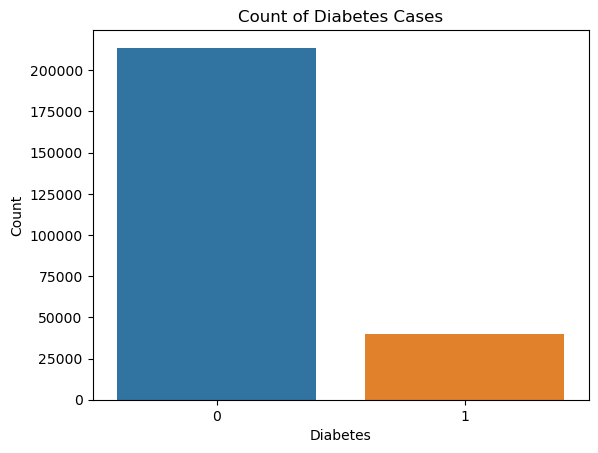

In [15]:
# Create a count plot
sns.countplot(x='diabetes_012', data=diabetes_df)

# Add labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Count of Diabetes Cases')

# Show the plot
plt.show()

In [16]:
#Calculates the absolute correlation between the 'diabetes_012' column and all other columns in the DataFrame 
corr = diabetes_df.corr()['diabetes_012'].abs()
print(corr.sort_values(ascending=False))

diabetes_012            1.000000
genhlth                 0.300785
highbp                  0.270334
bmi                     0.223851
diffwalk                0.222155
highchol                0.210290
age                     0.185891
heartdiseaseorattack    0.176933
physhlth                0.174948
income                  0.172794
education               0.131803
physactivity            0.121392
stroke                  0.104800
menthlth                0.074971
cholcheck               0.067879
smoker                  0.062778
veggies                 0.059219
hvyalcoholconsump       0.056682
fruits                  0.042088
nodocbccost             0.038025
sex                     0.029606
anyhealthcare           0.014079
Name: diabetes_012, dtype: float64


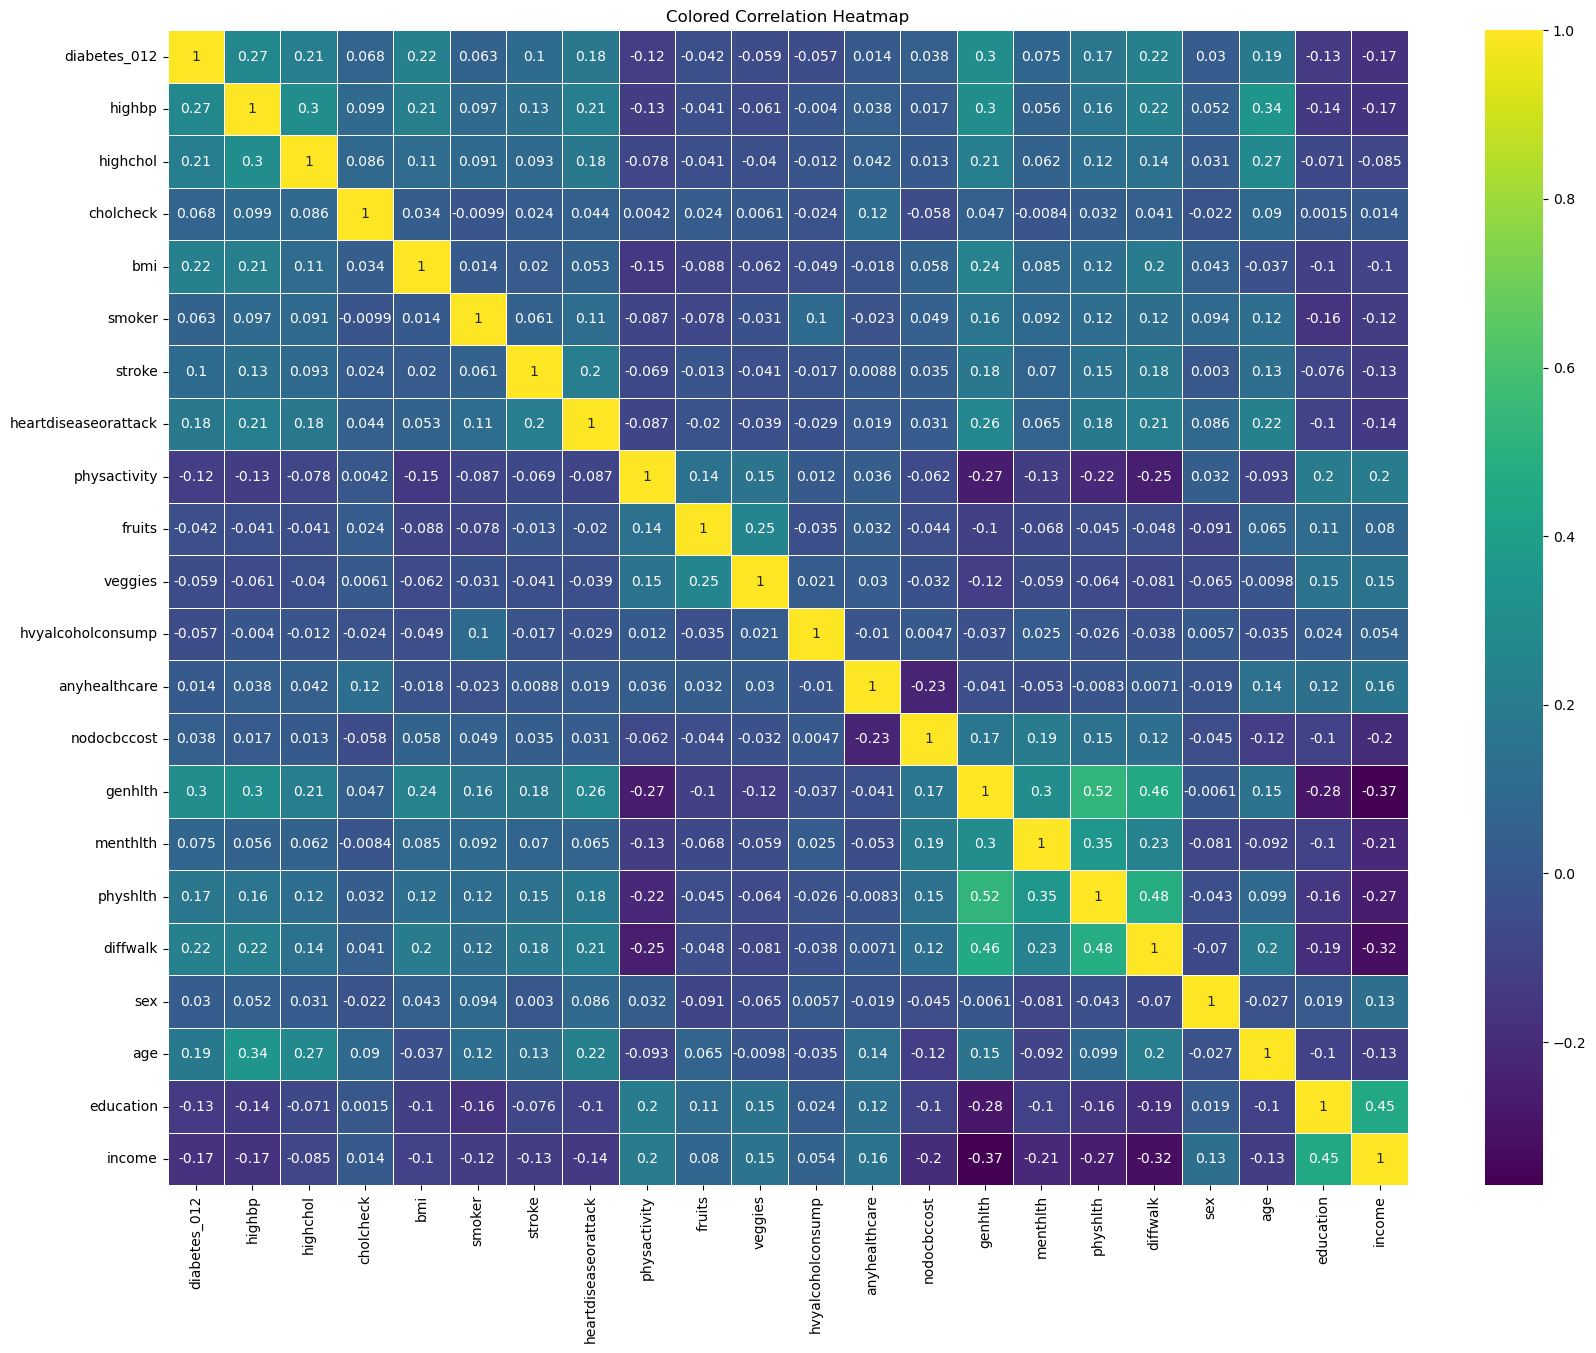

In [17]:
# Create a correlation matrix (for example)
correlation_matrix = diabetes_df.corr()

# Create a heatmap of the correlation matrix with colored values
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", linewidths=0.5)

# Add labels and a title
plt.title("Colored Correlation Heatmap")
plt.show()

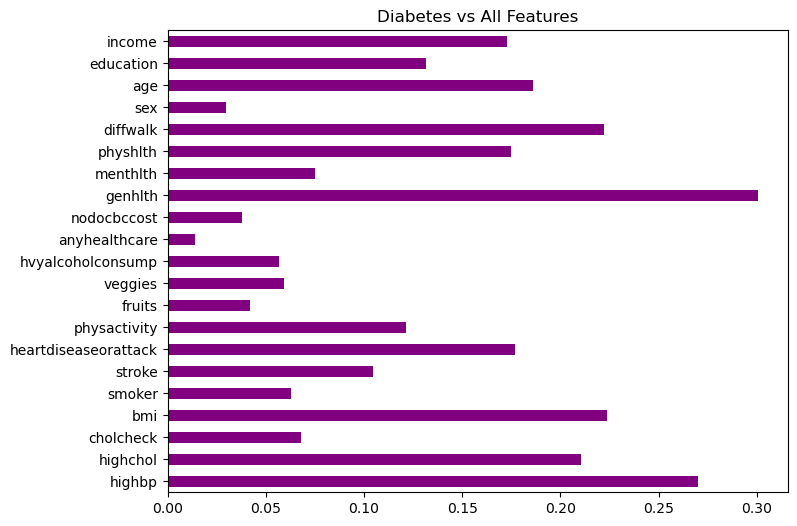

In [18]:
#Generates a horizontal bar plot to display the absolute correlation between the 'diabetes_012' column and all other columns
diabetes_df.drop('diabetes_012', axis=1).corrwith(diabetes_df.diabetes_012).abs().plot(
                                                           kind='barh',
                                                           figsize=(8, 6),
                                                           color='purple',
                                                           title="Diabetes vs All Features")
plt.show()

In [19]:
#Converting the dataframe to .csv format
diabetes_df.to_csv('./Preprocessed_diabetes_data.csv')